In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from WindPy import w
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
ldf = pd.read_excel('D:/workspace/crusader/data/list.xlsx')
ldf = ldf.dropna().set_index(u'代码')

In [4]:
DATA_DIR = 'D:/Data/industry/'

In [5]:
industry = [x for x in os.listdir(DATA_DIR)]

In [6]:
df = ''
for ind in industry:
    files = [f for f in os.listdir('%s/%s'%(DATA_DIR, ind))]
    for f in files:
        fname = '%s/%s/%s'%(DATA_DIR, ind, f)
        if not isinstance(df, pd.DataFrame):
            df = pd.read_excel(fname)
#             pass
        else:
            tdf = pd.read_excel(fname)
#             if 'M0000011' in tdf.columns:
#                 print fname
            cols = tdf.columns.difference(df.columns)
            df = df.merge(tdf[cols], how='outer', left_index=True, right_index=True)

In [7]:
df = df.fillna(method='ffill').resample('BM').last()

In [8]:
df.columns

Index([u'S0180893', u'M0044542', u'M0000617', u'M0000616', u'M0000622',
       u'S0248945', u'M5462042', u'S0109326', u'S0114184', u'M0000612',
       ...
       u'S0109336', u'S0030509', u'S0030512', u'S0030521', u'M0000545',
       u'S0242573', u'S0035972', u'S0030503', u'S0030527', u'S0030515'],
      dtype='object', length=196)

In [9]:
df = df[(df.index >= '2004-01-01') & (df.index <= '2018-02-28')]

In [10]:
df = df.dropna(axis=1)

In [11]:
df.shape

(170, 114)

In [12]:
df.tail()

,M0000617,M0000616,M0000622,M5462042,S0109326,M0000612,S0109328,S0031749,S0037083,S0039170,...,S0030518,S0000066,M0067855,S0030509,S0030512,M0000545,S0035972,S0030503,S0030527,S0030515
2017-10-31,1.6284,-0.4,0.3174,1510.086,13920.4,1.9,44425.8,61623.9,113034.48,68501.96,...,8.0,775.54,6.6272,0.8,5.6,6.2,13.0,8.9,5.8,1.7
2017-11-30,1.4963,-1.1,-9.4797,1510.086,13920.4,1.7,44425.8,61623.9,113034.48,68501.96,...,8.2,785.20,6.6107,0.8,4.5,6.1,13.3,8.7,5.5,1.6
2017-12-29,1.4963,-1.1,-9.4797,1510.086,13920.4,1.7,44425.8,61623.9,113034.48,68501.96,...,8.2,770.64,6.5120,0.8,4.5,6.1,13.3,8.7,5.5,1.6
2018-01-31,1.3000,-0.4,-8.6000,1510.086,14031.5,1.8,44585.2,61623.9,112219.60,68501.96,...,2.6,819.59,6.2920,1.4,12.3,6.2,5.5,8.7,0.2,0.3
2018-02-28,1.3000,-0.4,-8.6000,1510.086,14031.5,1.8,44585.2,61623.9,112219.60,68501.96,...,2.6,848.32,6.3335,1.4,12.3,6.2,5.5,8.7,0.2,0.3


In [13]:
INDEX_DIR = 'D:/Data/index'

In [14]:
dic = {}
for f in os.listdir(INDEX_DIR):
    if f.startswith('881') or f.startswith('886'):
        fname = '%s/%s'%(INDEX_DIR, f)
        temp = pd.read_excel(fname)
#         if 'outmessage' in temp.columns:
#             del temp['outmessage']
#             temp.to_excel(fname)
        dic[f.rstrip('.xlsx')] = temp['close']
sdf = pd.DataFrame(dic)

In [16]:
sdf.head()

,881001.WI,886001.WI,886002.WI,886003.WI,886004.WI,886005.WI,886006.WI,886007.WI,886008.WI,886009.WI,...,886060.WI,886061.WI,886062.WI,886063.WI,886064.WI,886065.WI,886066.WI,886067.WI,886068.WI,886069.WI
2000-01-04,1031.0334,1019.1205,1027.6196,1029.1210,1027.3595,1022.7531,1028.8376,1025.0027,1024.5097,1017.1766,...,1044.1071,1059.8894,1045.9163,1060.1399,1074.3802,1026.8947,1000.0,1023.8875,1000.0,1013.8165
2000-01-05,1034.4385,1019.1205,1072.0238,1023.4455,1041.9373,1023.0149,1042.9652,1020.2143,1031.2240,1015.5744,...,1025.7812,1045.5461,1040.6856,1049.1120,1057.1626,1034.6700,1000.0,1013.6467,1000.0,1022.1929
2000-01-06,1076.5120,1065.9656,1142.1885,1077.3701,1092.5583,1059.5913,1077.7500,1062.7158,1066.9311,1054.0628,...,1074.9502,1111.3880,1086.0938,1099.3059,1107.4381,1077.3181,1000.0,1051.2552,1000.0,1051.4964
2000-01-07,1117.7781,1094.6463,1190.6487,1100.3081,1126.8133,1093.4659,1102.4629,1102.5224,1108.0449,1085.6135,...,1106.5376,1139.3145,1121.7125,1128.7846,1144.6282,1121.0545,1000.0,1100.0054,1000.0,1074.8683
2000-01-10,1141.0309,1108.9866,1203.0406,1131.6378,1138.5167,1118.2369,1114.5656,1127.0507,1127.8480,1086.4123,...,1130.0068,1152.6513,1145.0987,1141.1456,1170.7990,1135.0082,1000.0,1115.0271,1000.0,1081.7237


In [17]:
k = 2
rdf = sdf.resample('BM').last().pct_change(periods=k)

In [18]:
rdf = rdf[(rdf.index >= '2004-01-01') & (rdf.index <= '2018-02-28')]

# 超额收益

In [19]:
ac_ret = rdf['886043.WI'] - rdf['881001.WI']

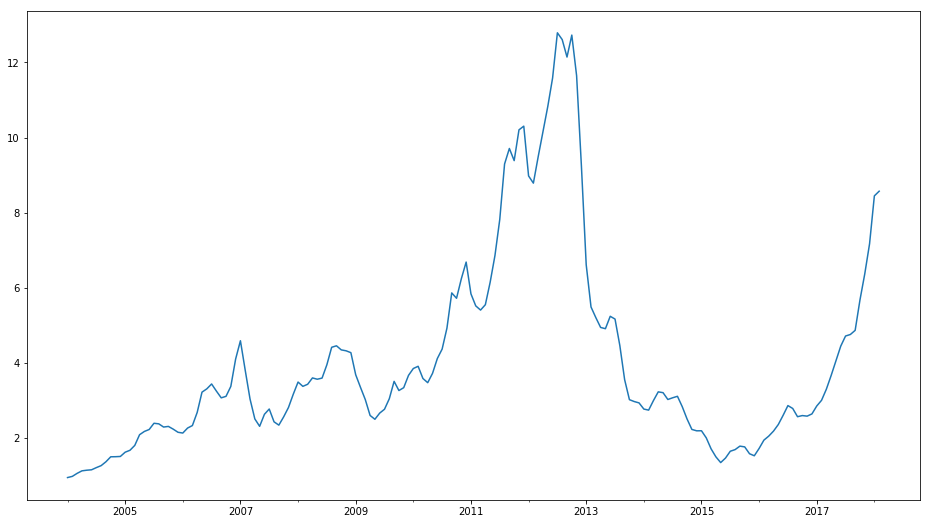

In [20]:
(1 + ac_ret).cumprod().plot(figsize=(16, 9))

In [20]:
X = df.pct_change(periods=12).iloc[12:].replace([-np.inf, np.inf], np.NAN).fillna(method='ffill').copy()
y = ac_ret.iloc[12:].copy()
y[y > 0] = 1
y[y < 0] = 0
print X.shape, y.shape

(158, 114) (158L,)


In [21]:
X = X.iloc[:-k]
y = y.shift(-k).iloc[:-k]
reg_y = ac_ret.shift(-k).iloc[12: -k]
print X.shape, y.shape, reg_y.shape

(157, 114) (157L,) (157L,)


# 回归问题

In [22]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X, reg_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
ldf.loc[X.columns[lasso.coef_ != 0]]

,名称
代码,
M0000617,CPI-粮食
M0000622,CPI-鲜菜
M0000612,消费者物价指数（CPI）
M0009973,月度新增人民币贷款
S6114593,乘用车销量
S0026990,原煤产量
S0027375,粗钢产量
S0027938,轿车产量
S0027635,铜材进口量


In [24]:
# reg = linear_model.LinearRegression()
reg = linear_model.Lasso(alpha=0.01)
reg.fit(X, reg_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
reg.score(X, reg_y)

0.28127127665366891

In [26]:
scores = cross_val_score(reg, X, reg_y, cv=10)

In [27]:
scores

array([-1.6246807 , -0.37214201, -0.22296907, -0.02696998, -1.37814791,
       -0.03717498, -0.37739972, -0.05345445, -0.10422036, -1.88612235])

scores.mean()

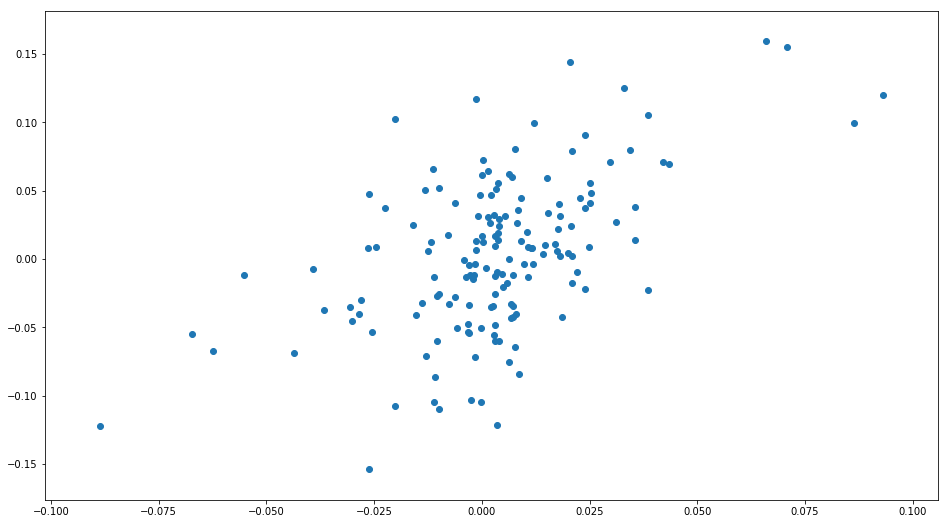

In [29]:
plt.figure(figsize=(16, 9))
plt.scatter(reg.predict(X), reg_y)

# 分类问题

In [30]:
clf = svm.SVC(C=0.5)
clf.fit(X, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
scores = cross_val_score(clf, X, y, cv=10)

In [32]:
scores.mean()

0.542156862745098

# 行业相对排名

In [56]:
k = 3
rdf = sdf.resample('BM').last().pct_change(periods=k)
rdf = rdf[(rdf.index >= '2004-01-01') & (rdf.index <= '2018-02-28')]
acc_df = rdf.subtract(rdf['881001.WI'].values, axis=0)
acc_df = acc_df[acc_df.columns.difference(['881001.WI'])]

In [67]:
# rank_df = acc_df.rank(axis=1, pct=True)
rank_df = acc_df.rank(axis=1)
rank_df = (rank_df / 23).astype(int)

In [68]:
X = df.pct_change(periods=12).iloc[12:].replace([-np.inf, np.inf], np.NAN).fillna(method='ffill').copy()
# X = df.copy()
y = rank_df['886052.WI'].iloc[12:]
# y = rank_df['886033.WI']

In [69]:
X = X.iloc[:-k]
y = y.shift(-k).iloc[:-k]
print X.shape, y.shape

(155, 114) (155L,)


In [70]:
print X.shape, y.shape
print y.unique()

(155, 114) (155L,)
[ 2.  1.  0.]


In [61]:
lr = linear_model.Lasso(alpha=0.1)
lr.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
ldf.loc[X.columns[lr.coef_ != 0]]

,名称
代码,
M0000617,CPI-粮食
M0000622,CPI-鲜菜
S6114593,乘用车销量
S0026990,原煤产量
S0073293,房地产新开工施工面积增速
S0073293,房地产新开工面积
S0073293,房地产新开工施工面积增速
S0073293,房地产新开工面积
S0073293,中国房地产新开工面积


In [63]:
scores = cross_val_score(lr, X, y, cv=10)

In [64]:
lr.score(X, y)

0.23435654803589723

In [65]:
scores.mean()

-1.0582785586518029

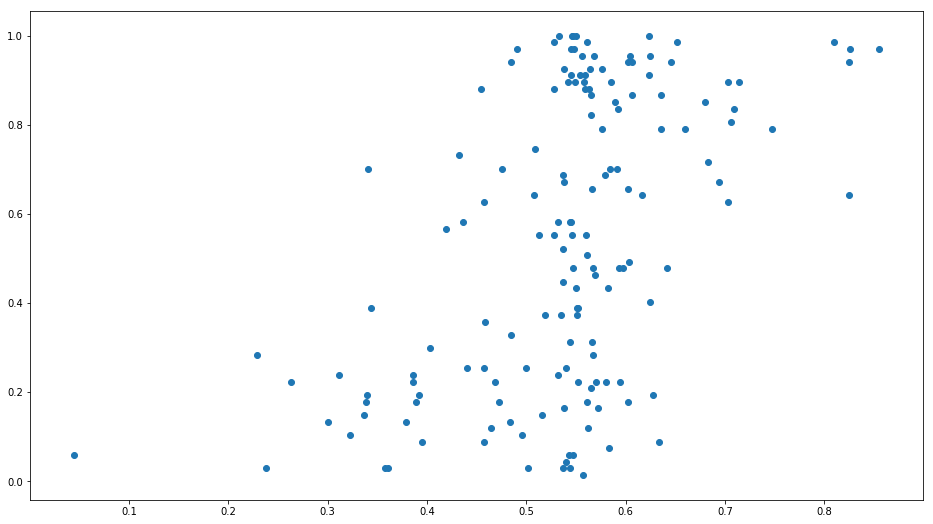

In [66]:
plt.figure(figsize=(16, 9))
plt.scatter(lr.predict(X), y)

In [111]:
# clf = svm.SVC(C=1)
clf = ensemble.RandomForestClassifier(max_depth=2, max_features=80)
# clf = linear_model.LogisticRegression(C=0.8)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=80, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
scores = cross_val_score(clf, X, y, cv=10)

In [113]:
scores

array([ 0.17647059,  0.05882353,  0.3125    ,  0.375     ,  0.25      ,
        0.33333333,  0.4       ,  0.53333333,  0.14285714,  0.14285714])

In [114]:
scores.mean()

0.27251750700280108

In [115]:
ldf.loc[X.columns[clf.feature_importances_ != 0]]

,名称
代码,
M0000617,CPI-粮食
M0001383,M1同比增速
M0001383,M1
M0001383,M1
M0009941,人民币存款同比增速
M5567879,名义GDP
M0009973,月度新增人民币贷款
S0073293,房地产新开工施工面积增速
S0073293,房地产新开工面积


# 无监督学习市场特征

In [116]:
X = pd.DataFrame(index=df.index, columns=df.columns)
for date in df.index:
    past = df[df.index <= date][-60:] # 过去5年
    X.loc[date] = (df.loc[date] - past.mean()) / past.std()
X = X.loc[X.index[24:]]

In [117]:
ac_ret = rdf['886057.WI'] - rdf['881001.WI']

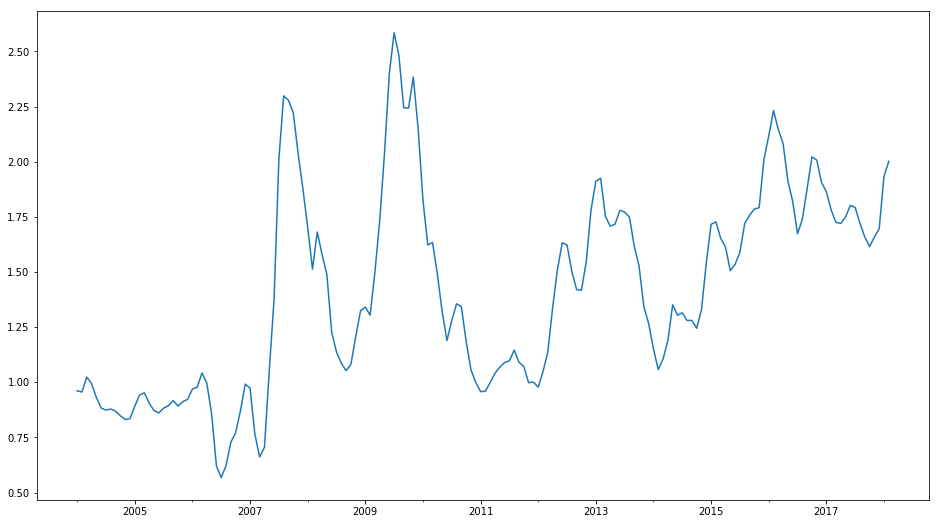

In [119]:
(1 + ac_ret).cumprod().plot(figsize=(16, 9))

In [996]:
scenario = X[(X.index >= '2007-01-01') & (X.index <= '2008-01-01')].copy()

In [997]:
data = scenario - scenario.mean(axis=0)
R = np.cov(data.astype(float), rowvar=False)
evals, evecs = np.linalg.eigh(R)
idx = np.argsort(evals)[::-1]
evecs = evecs[:, idx]
evals = evals[idx]

In [998]:
evals.cumsum() / evals.sum()

array([ 0.57601322,  0.77240976,  0.89584284,  0.95314955,  0.96860286,
        0.97936827,  0.98858731,  0.99342088,  0.99715907,  0.99911898,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [999]:
K = 4
# evecs = evecs[:, :K]
X_tran = np.dot(evecs[:, :K].T, X.T)

In [1000]:
trans_df = pd.DataFrame(X_tran.T, index=X.index, columns=range(1,X_tran.shape[0]+1))

In [1001]:
trans_df.head()

,1,2,3,4
2006-01-31,-2.25281,1.2615,-3.67619,-1.61907
2006-02-28,-2.96088,-1.83599,-3.02891,-0.0682151
2006-03-31,-3.24656,-1.28926,-3.15967,0.714798
2006-04-28,-2.74466,-1.11692,-3.09705,0.584713
2006-05-31,-1.54569,-0.18654,-3.29815,0.711768


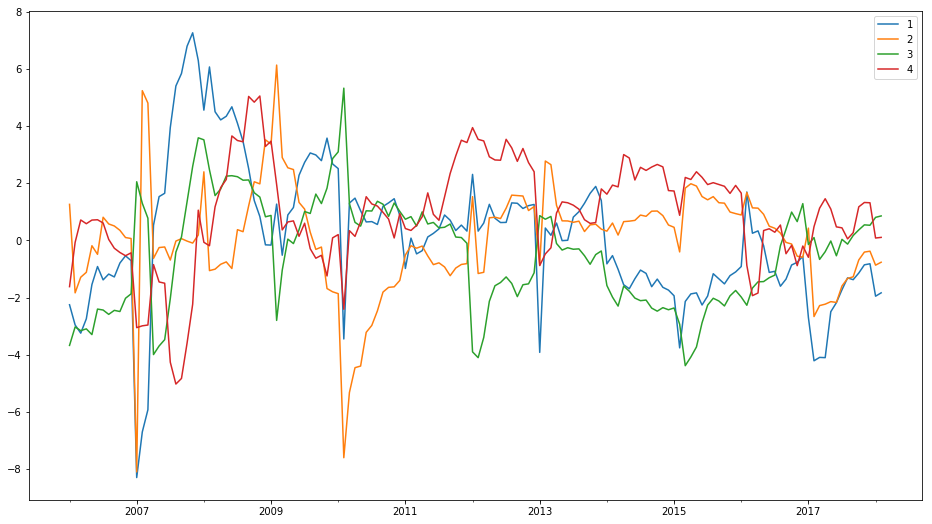

In [1002]:
trans_df.plot(figsize=(16, 9))

In [1003]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    ang = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    return ang
#     return ang if ang < np.pi else np.pi - ang

In [1004]:
lambdas = evals[:K]
lambdas = lambdas / lambdas.sum()

In [1005]:
lambdas

array([ 0.60432617,  0.20605008,  0.12950023,  0.06012352])

In [1037]:
angle = pd.Series(index=X.index)
for index in X.index:
    veca = X.loc[index]
    # 求与特征向量的加权平均夹角
    angs = [angle_between(veca, evecs[:, i]) for i in range(K)]
    angle.loc[index] = np.array(angs).dot(lambdas)
    # 求与情景点的平均夹角
#     angs = [angle_between(veca, scenario.loc[i]) for i in scenario.index]
#     angle.loc[index] = np.array(angs).mean()
angle = angle.rolling(window=60).apply(lambda x: (x[-1] - x.mean()) / x.std())

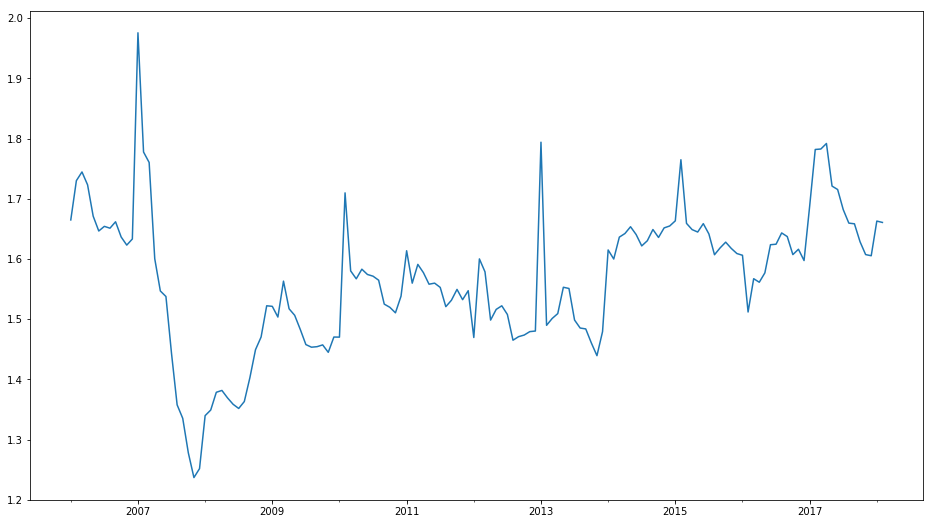

In [1038]:
angle.plot(figsize=(16, 9))
# (1 + ac_ret).cumprod().plot(figsize=(16, 9))

In [1039]:
pd.DataFrame({'angle': angle, 'ret': (1 + ac_ret).cumprod()}).to_excel('C:/Users/zhangyang01/Desktop/temp.xlsx')